In [25]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame

In [26]:
#Reading the dataset
boston_df = pd.read_csv(r'C:\Users\Davie\Boston_df.csv')
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population

In [27]:
X = boston_df.RM
X

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [28]:
X = np.vstack(boston_df.RM)
X

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [7]:
Y= boston_df.Price

line equation = y = mx+b
y = Ap
A = [x 1]
p = [m/b]

In [29]:
#A = [x 1]
X = np.column_stack((X, np.ones_like(X)))


In [30]:
X

array([[6.575, 1.   ],
       [6.421, 1.   ],
       [7.185, 1.   ],
       ...,
       [6.976, 1.   ],
       [6.794, 1.   ],
       [6.03 , 1.   ]])

In [31]:
#Now get out m and b values for our best fit line
#m/b
m,b = np.linalg.lstsq(X,Y,rcond=None)[0]

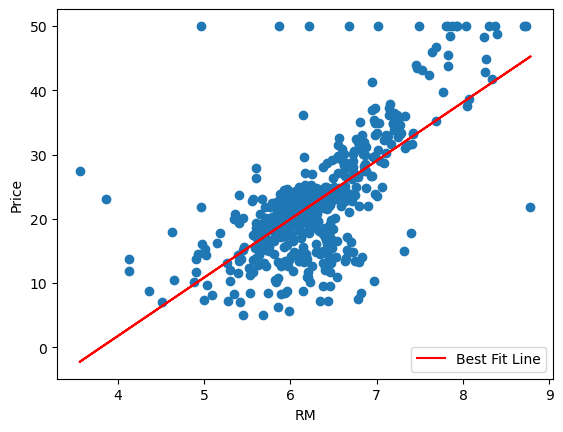

In [11]:
#First the original points,price vs number of rooms
plt.plot(boston_df.RM,boston_df.Price,'o')

#Next the best fit line
# y =mx+b
x = boston_df.RM
plt.plot(x, m*x + b, 'r', label='Best Fit Line')

plt.xlabel('RM')
plt.ylabel('Price')
plt.legend()
plt.show()

#GET ERROR

In [32]:
result = np.linalg.lstsq(X,Y,rcond=None)

error_total = result[1]
rmse = np.sqrt(error_total/len(X))
print('The root mean square was %.2f'%rmse)

The root mean square was 6.60


#LINEAR REGRESSION USING SKILEARN

In [40]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [35]:
lreg = LinearRegression()

In [36]:
X_multi = boston_df.drop('Price',1)
Y_target = boston_df.Price

C:\Users\Davie\AppData\Local\Temp\ipykernel_15896\282533246.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_multi = boston_df.drop('Price',1)


In [37]:
lreg.fit(X_multi,Y_target)
print('The estimated intercept coefficient is %.2f'%lreg.intercept_)
print('The number of coefficients used was %d'%len(lreg.coef_))

The estimated intercept coefficient is 36.46
The number of coefficients used was 13


In [38]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Feature']

coeff_df['Coefficient Estimate'] = Series(lreg.coef_)
coeff_df

,Feature,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


TRAIN AND TEST 

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [42]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(404, 2) (102, 2) (404,) (102,)


In [45]:
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [46]:
print("Fit a model X_train, and calculate the MSE with Y_train: %.2f"%np.mean((Y_train-pred_train)**2))
print("Fit a model X_train, and calculate the with X_test and Y_test: %.2f"%np.mean((Y_test-pred_test)**2))

Fit a model X_train, and calculate the MSE with Y_train: 43.00
Fit a model X_train, and calculate the with X_test and Y_test: 46.14


Text(0.5, 1.0, 'Residual Plots')

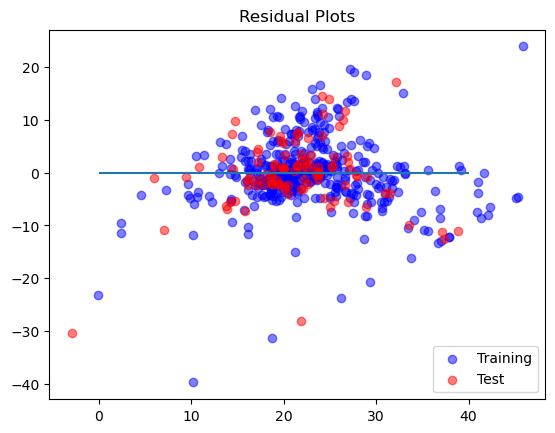

In [50]:
train = plt.scatter(pred_train,(pred_train - Y_train),c='b',alpha =0.5)
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha =0.5)

plt.hlines(y=0,xmin =0,xmax=40)

plt.legend((train, test), ('Training', 'Test'), loc='lower right')

plt.title('Residual Plots')
 